In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 22 11:13:14 2018

@author: lequang
"""
from __future__ import division

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



def infection_model(network, p, flights, start_node):

    #Create dataframe storing airport and infection time 
    airports = sorted(network.nodes())
    inf_time = np.full((len(airports),), np.inf)
    infection = pd.DataFrame({"Airport":airports, "InfectionTime": inf_time}) 
    
    #Set the infection time of first infected node:
    infection.InfectionTime[start_node] = flights.StartTime.min()
    #Loop over flights and start infection 
    for i in range(len(flights)):
        source = flights.Source[i]
        source_inf_time = infection.InfectionTime[source]
        if (source_inf_time < flights.StartTime[i]):
            random = np.random.rand()
            if random <= p:
                target = flights.Destination[i]
                target_cur_inf_time = infection.InfectionTime[target]
                target_new_inf_time = flights.EndTime[i]
                if target_new_inf_time < target_cur_inf_time:
                    infection.InfectionTime[target] = target_new_inf_time
    return infection


flights = pd.read_csv("./events_US_air_traffic_GMT.txt", sep = " ")

#Read in network data
networkpath = "./aggregated_US_air_traffic_network_undir.edg"
network = nx.read_weighted_edgelist(networkpath, nodetype = int )

#Run model with p = 1
start_node_0 = flights.Source[0] #Initiate the first infected node
flights = flights.sort_values("StartTime")
start_time = flights.StartTime.min() #First infected time
end_time = flights.EndTime.max()


infection = infection_model(network, 1 ,flights, start_node_0)
infection_times = infection.InfectionTime

print("Anchorage infection time: ",infection.InfectionTime[41])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Anchorage infection time:  1229290800.0


In [3]:
n_repeat = 50
n = len(network)
time = np.zeros((len(network),n_repeat), dtype=float)
for i in range(n_repeat):
    start_node = np.random.randint(0,n) 
    infection_i = infection_model(network, 0.5 ,flights, start_node)
    time[:,i] = infection_i.InfectionTime
time_median = np.average(time,axis = 1)
print(time_median)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[1.22933416e+09 1.22930692e+09 1.22930099e+09 1.22929380e+09
 1.22928488e+09 1.22929642e+09 1.22936111e+09 1.22929131e+09
 1.22930225e+09 1.22933663e+09 1.22930426e+09 1.22930916e+09
 1.22929088e+09 1.22931958e+09 1.22931235e+09 1.22929868e+09
 1.22929915e+09 1.22933901e+09 1.22934581e+09 1.22930442e+09
 1.22930164e+09 1.22930191e+09 1.22930592e+09 1.22930537e+09
 1.22929726e+09 1.22930178e+09 1.22930142e+09 1.22929757e+09
 1.22930306e+09 1.22931166e+09 1.22930560e+09 1.22929522e+09
 1.22930142e+09 1.22930261e+09 1.22929517e+09 1.22938510e+09
 1.22936137e+09 1.22931940e+09 1.22930452e+09 1.22935200e+09
            inf 1.22932645e+09 1.22941880e+09 1.22936323e+09
 1.22936169e+09 1.22932388e+09 1.22931375e+09 1.22929871e+09
 1.22929952e+09 1.22930306e+09 1.22929942e+09 1.22936193e+09
 1.22944050e+09 1.22936419e+09 1.22945449e+09 1.22932583e+09
 1.22933857e+09 1.22940454e+09 1.22941484e+09 1.22942473e+09
 1.22934854e+09 1.22933065e+09 1.22932009e+09 1.22930682e+09
 1.22931205e+09 1.229307

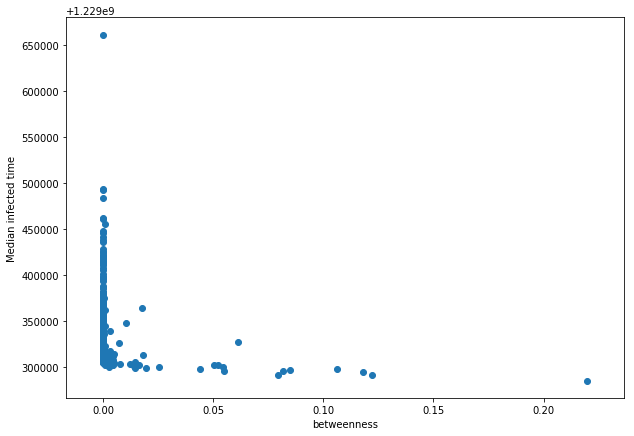

Spearman coef betweenness : SpearmanrResult(correlation=-0.6839250317668392, pvalue=8.131610533577642e-40)


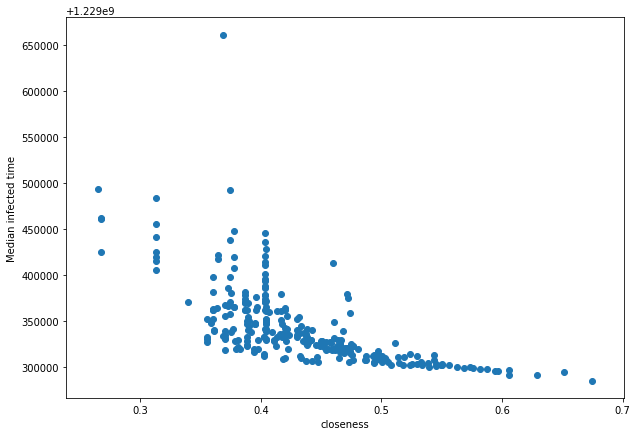

Spearman coef closeness : SpearmanrResult(correlation=-0.7770590561121733, pvalue=1.2497947080354859e-57)


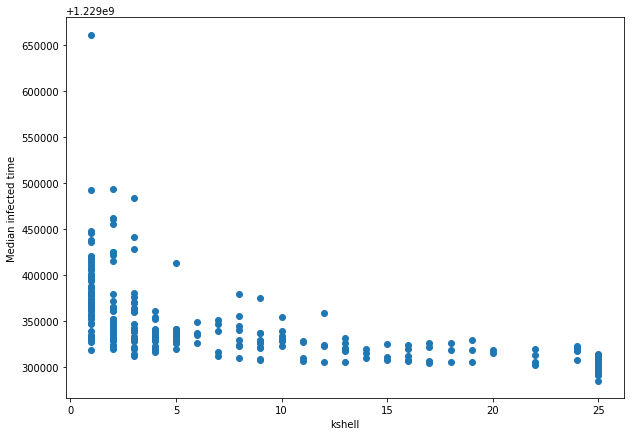

Spearman coef kshell : SpearmanrResult(correlation=-0.8265990016782375, pvalue=4.059997966609726e-71)


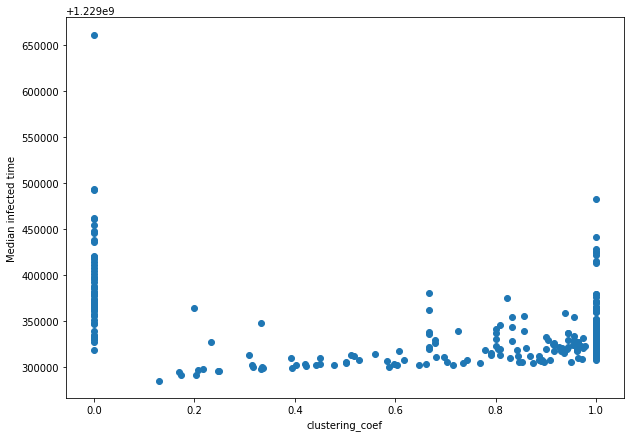

Spearman coef clustering_coef : SpearmanrResult(correlation=-0.09539964845914344, pvalue=0.11184324050457575)


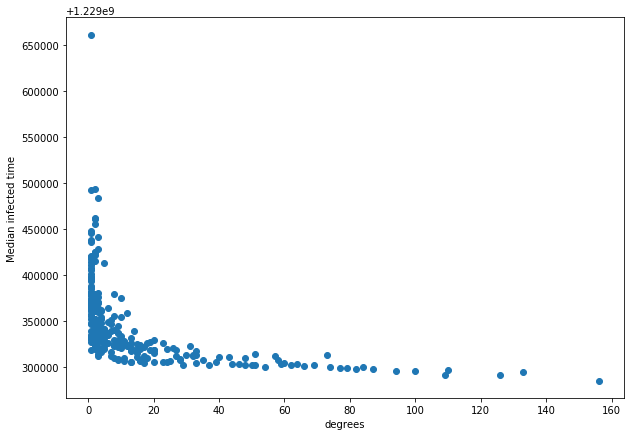

Spearman coef degrees : SpearmanrResult(correlation=-0.8272743163498704, pvalue=2.4871189553837727e-71)


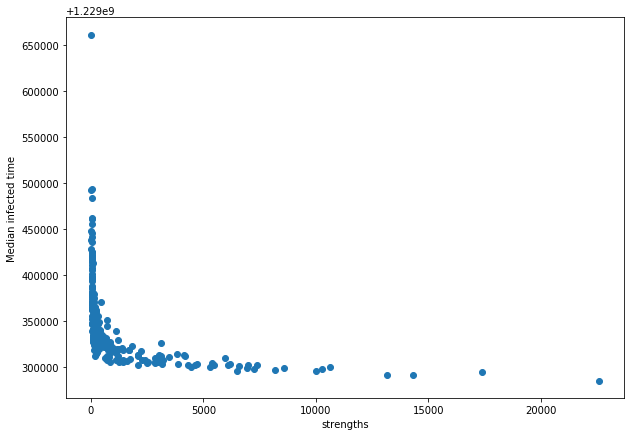

Spearman coef strengths : SpearmanrResult(correlation=-0.8981690036006106, pvalue=7.367795073640249e-101)


In [4]:
#Task 4 cont
from scipy import stats

betweenness = nx.betweenness_centrality(network)
closeness = nx.closeness_centrality(network)
kshell = nx.core_number(network)
clustering_coef = nx.clustering(network)   
degrees = nx.degree(network)
strengths = nx.degree(network, weight = "weight")

betweeness_vec = []
closeness_vec = []
kshell_vec = []
clustering_coef_vec = []
degree_vec = []
strength_vec = []
timemedian_vec = []
for node in network.nodes():
    betweeness_vec.append(betweenness[node])
    closeness_vec.append(closeness[node])
    kshell_vec.append(kshell[node])
    clustering_coef_vec.append(clustering_coef[node])
    degree_vec.append(degrees[node])
    strength_vec.append(strengths[node])
    timemedian_vec.append(time_median[node])

                   
y_values = [betweeness_vec, closeness_vec, kshell_vec, clustering_coef_vec, degree_vec, strength_vec]
y_labels = ["betweenness", "closeness", "kshell", "clustering_coef", "degrees", "strengths"]


for y_val, label in zip(y_values, y_labels):
    fig = plt.figure(figsize=(10,7))
    plt.scatter(y_val, timemedian_vec)
    plt.xlabel(label)
    plt.ylabel("Median infected time")
    plt.show()
    spearman = stats.spearmanr(y_val, timemedian_vec)
    print("Spearman coef " + label + " :", spearman)


In [5]:
import random
random.seed(100)
def infection_model_immunize(network, p, flights, start_node, immunized_node):
    
    #Create dataframe storing airport and infection time 
    airports = sorted(network.nodes())
    inf_time = np.full((len(airports),), np.inf)
    infection = pd.DataFrame({"Airport":airports, "InfectionTime": inf_time}) 
    #Set the infection time of first infected node:
    infection.InfectionTime[start_node] = flights.StartTime.min()
    #Loop over flights and start infection 
    for i in range(len(flights)):
        source = flights.Source[i]
        source_inf_time = infection.InfectionTime[source]
        if (source_inf_time < flights.StartTime[i]) and (source not in immunized_node):
            random = np.random.rand()
            if random <= p:
                target = flights.Destination[i]
                target_cur_inf_time = infection.InfectionTime[target]
                target_new_inf_time = flights.EndTime[i]
                if target_new_inf_time < target_cur_inf_time:
                    infection.InfectionTime[target] = target_new_inf_time
    return infection

In [17]:
#Immunized node:
im_random = []
im_kshell = sorted(kshell, key=kshell.get, reverse=True)[0:9]
im_cluster = sorted(clustering_coef, key=clustering_coef.get, reverse=True)[0:9]
im_degree = []
im_strength = []
im_betweenness = sorted(betweenness, key=betweenness.get, reverse=True)[0:9]
im_closeness = sorted(closeness, key=closeness.get, reverse=True)[0:9]
im_social = []
for i in range(10):
    random = np.random.randint(len(network))
    im_random.append(random)
    social = np.random.choice(list(network.neighbors(random)))
    im_social.append(social)
for u,v in sorted(degrees, key = lambda tup: tup[1], reverse = True)[0:9]:
    im_degree.append(u)

for u,v in sorted(strengths, key = lambda tup: tup[1], reverse = True)[0:9]:
    im_strength.append(u)

im_total = im_random + im_kshell + im_cluster + im_degree + im_strength + im_betweenness + im_closeness + im_social
print(im_total)


[17, 94, 206, 183, 199, 190, 46, 267, 197, 180, 1, 2, 3, 4, 5, 10, 12, 15, 16, 0, 264, 148, 163, 143, 118, 127, 60, 67, 4, 3, 7, 5, 12, 31, 34, 27, 48, 4, 3, 7, 12, 16, 24, 31, 15, 5, 4, 7, 3, 27, 5, 34, 12, 41, 31, 4, 3, 7, 5, 12, 34, 31, 27, 24, 11, 97, 7, 27, 5, 16, 64, 34, 48, 20]


In [18]:
#Random start node 
j = 0
start_list = []
while j < 20:
    random = np.random.randint(len(network))
    if random not in im_total:
        start_list.append(random)
        j+=1
print(start_list)

[258, 223, 200, 65, 217, 100, 13, 128, 222, 92, 254, 9, 19, 162, 38, 273, 78, 120, 174, 35]


In [19]:
def immunize_strategy(start_node, immunize_node):
    n = len(network)
    time = np.zeros((len(network),len(start_node)), dtype=float)
    for i in range(20):
        infection_i = infection_model_immunize(network, 0.5 ,flights, start_node, immunize_node)
        time[:,i] = infection_i.InfectionTime
    time_median = np.average(time,axis = 1)
    return time_median



In [20]:
print("Calculating time_random")
time_random = immunize_strategy(start_list, im_random)
time_kshell = immunize_strategy(start_list, im_kshell)
print("Calculating time_cluster")
time_cluster = immunize_strategy(start_list, im_cluster)
time_degree = immunize_strategy(start_list, im_degree)
print("Calculating time_strength")
time_strength = immunize_strategy(start_list, im_strength)
time_betweenness = immunize_strategy(start_list, im_betweenness)
print("Calculating time_closeness")
time_closeness = immunize_strategy(start_list, im_closeness)
time_social = immunize_strategy(start_list, im_social)

Calculating time_random


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Calculating time_cluster
Calculating time_strength
Calculating time_closeness


In [29]:
print(len(time_random))


279


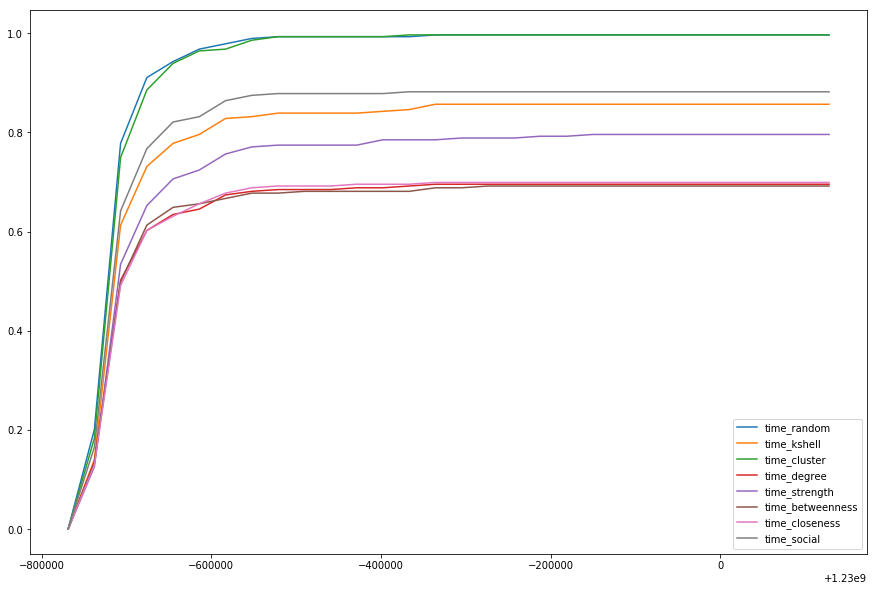

In [33]:
def immunize_strategy_visualization(start, end, time_strategy, label):
    stepsize = 30
    t = np.linspace(start, end, stepsize)  #To increase this stepsize
    p_t = np.zeros((30,), dtype=float)
    for j in range (0,stepsize):
        count = (time_strategy < t[j]).sum()
        prob = float(count/len(time_strategy))
        p_t[j] = prob
    plt.plot(t, p_t, label = label)
strategies = [time_random, time_kshell, time_cluster, time_degree, time_strength, time_betweenness, time_closeness, time_social]
labels = ["time_random", "time_kshell", "time_cluster", "time_degree", "time_strength", "time_betweenness", "time_closeness", "time_social"]
plt.figure(figsize = (15,10))
for strategy, label in zip(strategies,labels):
    immunize_strategy_visualization(start_time, end_time, strategy, label)

plt.legend()
plt.show()
